In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')

from config.paths import RAW_DATA_PATH, PROCESSED_DATA_PATH

In [2]:
processed_data_path = PROCESSED_DATA_PATH / "processed_data.parquet"
df = pd.read_parquet(processed_data_path)
movie_titles_path = RAW_DATA_PATH / "movie_titles_fixed.csv"
movie_titles = pd.read_csv(movie_titles_path, sep=';', encoding='latin1', header=None, names=['id', 'year', 'title'])

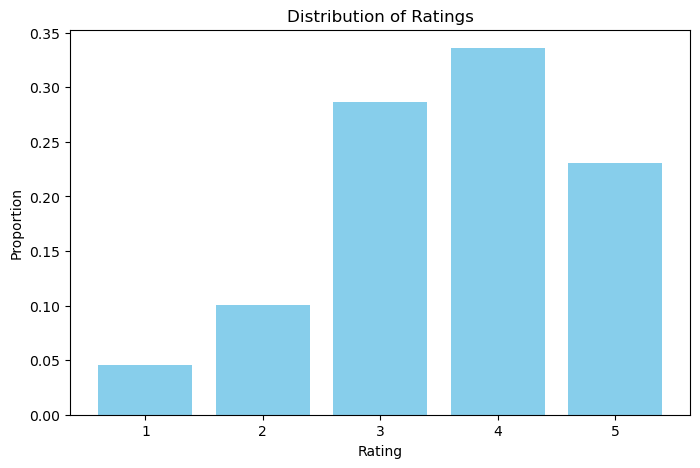

In [3]:
rating_dist = df['rating'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8,5))
plt.bar(rating_dist.index, rating_dist.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Distribution of Ratings')
plt.xticks(rating_dist.index) 
plt.show()

In [4]:
print(f"Number of distinct movies: {df['movie_id'].nunique()}")
print(f"Number of distinct users:  {df['customer_id'].nunique()}")

Number of distinct movies: 17713
Number of distinct users:  463770


In [5]:
ratings_per_movie = df.groupby('movie_id')['rating'].count()
ratings_per_movie.describe()

count     17713.000000
mean       5667.833286
std       16918.737236
min          50.000000
25%         193.000000
50%         566.000000
75%        2681.000000
max      232659.000000
Name: rating, dtype: float64

In [6]:
avg_rating_per_movie = df.groupby('movie_id')['rating'].mean()
best_rated_movies = avg_rating_per_movie.sort_values(ascending=False).head(10)
worst_rated_movies = avg_rating_per_movie.sort_values().head(10)
print(f"Best rated movies: \n{best_rated_movies}")
print(f"\Worst rated movies: \n{worst_rated_movies}")

Best rated movies: 
movie_id
14961    4.723445
7230     4.716644
7057     4.702672
3456     4.670846
9864     4.644097
15538    4.605052
10464    4.595506
14791    4.594595
14550    4.593358
12398    4.591572
Name: rating, dtype: float64
\Worst rated movies: 
movie_id
515      1.287879
16487    1.347222
11768    1.375610
17429    1.396761
3575     1.400000
17577    1.400000
8069     1.422222
2426     1.457831
4202     1.487395
1227     1.496241
Name: rating, dtype: float64


In [7]:
most_rated_movies = ratings_per_movie.sort_values(ascending=False).head(10)
least_rated_movies = ratings_per_movie.sort_values().head(10)
print(f"Most rated movies: \n{most_rated_movies}")
print(f"\nLeast rated movies: \n{least_rated_movies}")

Most rated movies: 
movie_id
5317     232659
15124    216242
14313    200596
15205    195964
1905     193711
6287     193105
11283    181432
16377    181308
16242    177856
12470    177380
Name: rating, dtype: int64

Least rated movies: 
movie_id
10840    50
15202    50
6074     51
5260     52
4035     52
16996    53
10640    53
10578    53
9566     54
1858     54
Name: rating, dtype: int64
